# Programming Assignment 6
CptS 215 Fall 2020<br>
Date: 12/06/2020<br>
Author: Christopher Mims


## Build Initial Graph
The first thing we need to do to play the Kevin Bacon game is to build an initial graph of all actors with their connections through the movies they appeared in. We were given three files, one with actors/actresses and a corresponding reference number, another with movies and corresponding reference numbers, and the last had the movie/actor reference number pairs. Each of these files needs to be read in and then a graph is built out the results. I chose to read in the actor and movie files as dictionaries. This allowed me to reference an actor/movie with its corresponding reference number. Then I also read in the movies-actors file as a dictionary. This allowed me to walk through that dictionary and pair all actors with a movie creating edges in the graph. Since we need the graph to be able to traverse in any direction at this point, I added each connection both ways: actor1 with actor2 through movie1 and actor2 with actor1 through movie1. Doing this allows for the breadth first search (BFS) to find the shortest routes.<br>
<b>Note:</b> Minor changes to base classes were made to change "weight" measure to a string and not a numeric, as well as string statements to help with debugging.

In [1]:
from pa6_base_classes import *
import collections
import networkx as nxg
import matplotlib.pyplot as plt

amGraph = Graph()
actors = {}
movies = {}
movie_actors = {}

def build_initial_Graph():
    # This reads in the actors file and creates a dictionary
    with open("./data/actors.txt", 'r', encoding="latin-1") as file1:
        for line in file1:
            text1 = line.split("|")
            actors[text1[0]] = text1[1].strip()
    file1.close()

    # This reads in the movies file and creates a dictionary
    with open("./data/movies.txt", 'r', encoding="latin-1") as file2:
        for line in file2:
            text2 = line.split("|")
            movies[text2[0]] = text2[1].strip()
    file2.close()

    # This reads in the movie-actors file and creates a dictionary
    with open("./data/movie-actors.txt", 'r', encoding="latin-1") as file3:
        for line in file3:
            text3 = line.split("|")
            key = text3[0]
            movie_actors.setdefault(key, [])  # this sets up the list for each value to be appended to, setdefault initializes a key if one is not given
            movie_actors[key].append(text3[1].strip())
    file3.close()

    # This goes through the movies-actors dictionary and adds all the vertecies/edges to the graph
    for key, value in movie_actors.items():
        for i in range(len(value)):
            for j in range(i + 1, len(value)):
                amGraph.add_edge(actors.get(value[i]), actors.get(value[j]), movies.get(key))
                amGraph.add_edge(actors.get(value[j]), actors.get(value[i]), movies.get(key))

build_initial_Graph()

## Build BFS Graph
Now that we have the inital graph with all connections between actors/actresses through their movies, we can build a BFS graph that will give us the shortest path back to Kevin Bacon from any actor or actress.<br>
It is important to note that since there is no "weight" between actors/actresses, there is no use in using Dijkstra's algorithm for this instance. If we were to "weight" each movie based on its gross revenue, then the use of Dijkstra's algorithm could find the path to Kevin Bacon through the lowest grossing films.<br>
I used Python's ADT Deque in order to perform my BFS and build my graph. While building the graph, I updated the predecessor and distance variables for each actor/actress. This allows for the traversal back from any actor/actress to Kevin Bacon without first traversing through the graph to get to the actor/actress. It also allows for some statistical analysis of the graph, assigning a "Bacon number" to each actor/actress.<br>
<b>Notes:</b> When building the BFS, we need to reference the inital graph to find the connections, but then add a new vertex to the BRS graph. Troubles in this area for me was knowing when to reference the actual vertex or the name of the vertex. I was trying to get the actual vertex and was only getting a copy and was unable to update the predecessor and distance until I able to add each one as a vertex, then reference them to create the edges.

In [2]:
def build_bfs_Graph():
    bfs = Graph()
    q = collections.deque([amGraph.get_vertex('Kevin Bacon')])
    bfs.add_vertex('Kevin Bacon')

    while q:
        V_dest = q.pop()
        if V_dest.connected_to.items() is not None: 
            for key, value in V_dest.connected_to.items():
                if key.ID not in bfs:
                    V_dest = bfs.get_vertex(V_dest.ID)
                    V_src = bfs.add_vertex(key.ID, V_dest.distance + 1, bfs.get_vertex(V_dest.ID))
                    bfs.add_edge(V_dest.ID, V_src.ID, value)
                    q.appendleft(amGraph.get_vertex(V_src.ID))
    return bfs

T = build_bfs_Graph()

## Search and Return Results
The next step in this process is being able to find the actor or actress in the graph and walk back to the root, Kevin Bacon. With my earlier implementation, I was able to accomplish this through the use of the predecessor variable. I was able to store the reference to the predecessor vertex in each of the vertices. Since Kevin Bacon does not have a predecessor, this loop can run until it hits a "None" for the predecessor. This fuction will need to take the name of the actor/actress (will become important in the user interface later). If the actor/actess is not found in the graph, it will return "Actor not connected to Kevin Bacon." Otherwise, it will return each actor/actress and movies starred in that connect them to Kevin Bacon.

In [3]:
def find_actor(name):
    if name == "":
        return
    curr = T.get_vertex(name)
    if curr is not None:
        next = curr.predecessor
        while next is not None:
            movie = next.connected_to[curr]
            print(curr.ID,
                "appeared in",
                movie,
                "with",
                next.ID)
            curr = next
            next = curr.predecessor
    else:
        print("Actor not connected to Kevin Bacon.")

<i>Examples:</i>

In [4]:
actorsExamples = ["Paul Walker", "Sandra Bullock", "Will Smith"]
for actor in actorsExamples:
    print("Finding " + actor + "'s connection:")
    find_actor(actor)
    print("\n")

Finding Paul Walker's connection:
Paul Walker appeared in 2 Fast 2 Furious (2003) with Cole Hauser
Cole Hauser appeared in Hi-Lo Country, The (1998) with Billy Crudup
Billy Crudup appeared in Sleepers (1996) with Kevin Bacon


Finding Sandra Bullock's connection:
Sandra Bullock appeared in Vanishing, The (1993) with Kiefer Sutherland
Kiefer Sutherland appeared in Flatliners (1990) with Kevin Bacon


Finding Will Smith's connection:
Will Smith appeared in Men in Black (1997) with Linda Fiorentino
Linda Fiorentino appeared in Queens Logic (1991) with Kevin Bacon




## User Interface
The final step to play the game is to have a user interface/interaction with the program. In this section we will need the user to enter a name of an actor or actress. This will repeat until the user simply presses the enter key without any input. 

In [5]:
print("To quit program, press return (no entry).")
actor_name = "bacon"

while actor_name != "":
    actor_name = input("Enter the name of an actor/actress: ")
    find_actor(actor_name)


To quit program, press return (no entry).
Enter the name of an actor/actress: 


## Visualizing Results of a Search
Now that we can represent the connection with printed statements, how about we visualize the connections graphically?<br>
In order to visualize the connections graphically, we will need to use the collection networkx. 

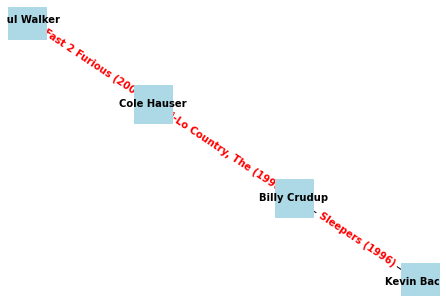

In [7]:
def visualize_graph(name):
    viz = nxg.Graph()
    w = 3 # Setting the weight integer


    curr = T.get_vertex(name)
    if curr:
        next = curr.predecessor
        viz.add_node(curr.ID)
        while next is not None:
            movie = next.connected_to[curr]
            viz.add_node(next.ID)
            viz.add_edge(next.ID, curr.ID, weight = w, label = movie, font_color='r')
            curr = next
            next = curr.predecessor
    
    pos = nxg.spring_layout(viz)
    edge_labels = nxg.get_edge_attributes(viz, 'label')
    nxg.draw(viz, pos, with_labels=True, node_color='lightblue', node_shape='s', node_size=1500, font_size=10, font_weight='bold')
    nxg.draw_networkx_edge_labels(viz, pos, edge_labels, font_color = 'red', font_weight='bold')
    plt.show()


name = 'Paul Walker'
visualize_graph(name)

## Statistics
Now to do some statistics on the graph.<br>
### Highest Bacon Number
One statistic is to find the highest Bacon number of the actors that are connected to Kevin Bacon.<br>
The following function iterates through each actor in the actor's list, checks to see if that actor is in the BFS subgraph, then compares the Bacon number to the highest Bacon number found so far.

In [8]:
def high_Bacon():
    highest = None
    for actor in actors.items():
        temp = actor[1]
        act = T.get_vertex(temp)
        if act:
            if highest is None:
                highest = act
            if act.distance > highest.distance:
                highest = act

    return highest.ID, highest.distance

highBacon = high_Bacon()
print(highBacon[0], " has the highest Bacon number at ", highBacon[1])

Richard Arlen  has the highest Bacon number at  8


### Average Bacon Number
Another statistic is to find the average Bacon number of the actors that are connected to Kevin Bacon<br>
The following function iterates through each actor and if the actor is in the BFS subgraph, it increments a count and adds the Bacon number to a running total. Once all actors have been iterated through, the total is divided by the count to generate the average.

In [9]:
def average_Bacon():
    num = 0
    sum = 0
    for actor in actors.items():
        act = T.get_vertex(actor[1])
        if act:
            num += 1
            sum += act.distance
    avg = sum / num 
    return avg

average = average_Bacon()
print("The average Bacon number is: {0:.2f}".format(average))

The average Bacon number is: 3.28
